### Import Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Dataset

In [4]:
# Load data from CSV file
data_path = "C:\\Users\\David\\OneDrive\\Documents\\Business analytics\\booking.csv"
source_df = pd.read_csv(data_path)

In [5]:
source_df

Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36280                         0                      2   Meal Plan 2   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   
36284                         0                      5   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
0                      0  Room_Type 1        224             Offline   
1                      0  Room_Type 1          5              Online   
2                      0  Room_Type 1          1              Online   
3                      0  Room_Type 1        211              Online   
4                      0  Room_Type 1         48              Online   
...                  ...          ...        ...                 ...   
36280                  0  Room_Type 1        346              Online   
36281                  0  Room_Type 1         34              Online   
36282                  0  Room_Type 4         83              Online   
36283                  0  Room_Type 1        121             Offline   
36284                  0  Room_Type 4         44              Online   

       repeated  P-C  P-not-C  average price  special requests  \
0             0    0        0          88.00                 0   
1             0    0        0         106.68                 1   
2             0    0        0          50.00                 0   
3             0    0        0         100.00                 1   
4             0    0        0          77.00                 0   
...         ...  ...      ...            ...               ...   
36280         0    0        0         115.00                 1   
36281         0    0        0         107.55                 1   
36282         0    0        0         105.61                 1   
36283         0    0        0          96.90                 1   
36284         0    0        0         133.44                 3   

      date of reservation booking status  
0               10/2/2015   Not_Canceled  
1               11/6/2018   Not_Canceled  
2               2/28/2018       Canceled  
3               5/20/2017       Canceled  
4               4/11/2018       Canceled  
...                   ...            ...  
36280           9/13/2018       Canceled  
36281          10/15/2017   Not_Canceled  
36282          12/26/2018   Not_Canceled  
36283            7/6/2018   Not_Canceled  
36284          10/18/2018   Not_Canceled  

[36285 rows x 17 columns]

The dataset contains information related to hotel bookings. using this dataset, we can significantly contribute to enhancing the efficiency and decision-making processes within the hotel's supply chain. In the context of the hotel industry, the supply chain process encompasses various aspects, including managing room inventory, optimizing pricing strategies, and forecasting demand. 

#### Potential Applications for Supply Chain Improvement:
1. **Demand Forecasting:**
   - Analyzing lead times and historical booking data can help forecast future demand. This information is valuable for optimizing inventory levels, ensuring the hotel has sufficient rooms available during high-demand periods, and minimizing overbooking.

2. **Dynamic Pricing:**
   - Leveraging the average price information, the hotel can implement dynamic pricing strategies. Adjusting prices based on demand patterns, seasonality, and lead times can maximize revenue and attract customers during off-peak times.

3. **Resource Optimization:**
   - Understanding the temporal aspects of reservations through date-related features enables the hotel to efficiently allocate staff, services, and resources during peak and off-peak periods, enhancing overall operational efficiency.

4. **Customer Behavior Analysis:**
   - Features derived from the dataset, such as one-hot encoded categorical variables, can be used for customer segmentation and behavior analysis. This information is valuable for tailoring marketing strategies and improving customer satisfaction.

### Exploring The Dataset

In [6]:
# Generate a pandas profiling report
profile = ProfileReport(source_df, title="Pandas Profiling Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Display the shape and the first few rows of the DataFrame
print(source_df.shape)
source_df.head()

(36285, 17)


Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [9]:
# Display information about the DataFrame
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [10]:
# Display descriptive statistics of the DataFrame
source_df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price  special requests  
count  36285.000000  36285.000000   36285.000000      36285.000000  
mean       0.023343      0.153369     103.421636          0.619733  
std        0.368281      1.753931      35.086469          0.786262  
min        0.000000      0.000000       0.000000          0.000000  
25%        0.000000      0.000000      80.300000          0.000000  
50%        0.000000      0.000000      99.450000          0.000000  
75%        0.000000      0.000000     120.000000          1.000000  
max       13.000000     58.000000     540.000000          5.000000

In [11]:
# Display the number of unique values in each column
source_df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [12]:
# Display the count of missing values for each column in descending order
print(source_df.isnull().sum().sort_values(ascending=False))

Booking_ID                  0
market segment type         0
date of reservation         0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
lead time                   0
number of adults            0
room type                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
booking status              0
dtype: int64


### Visualization with Outliers

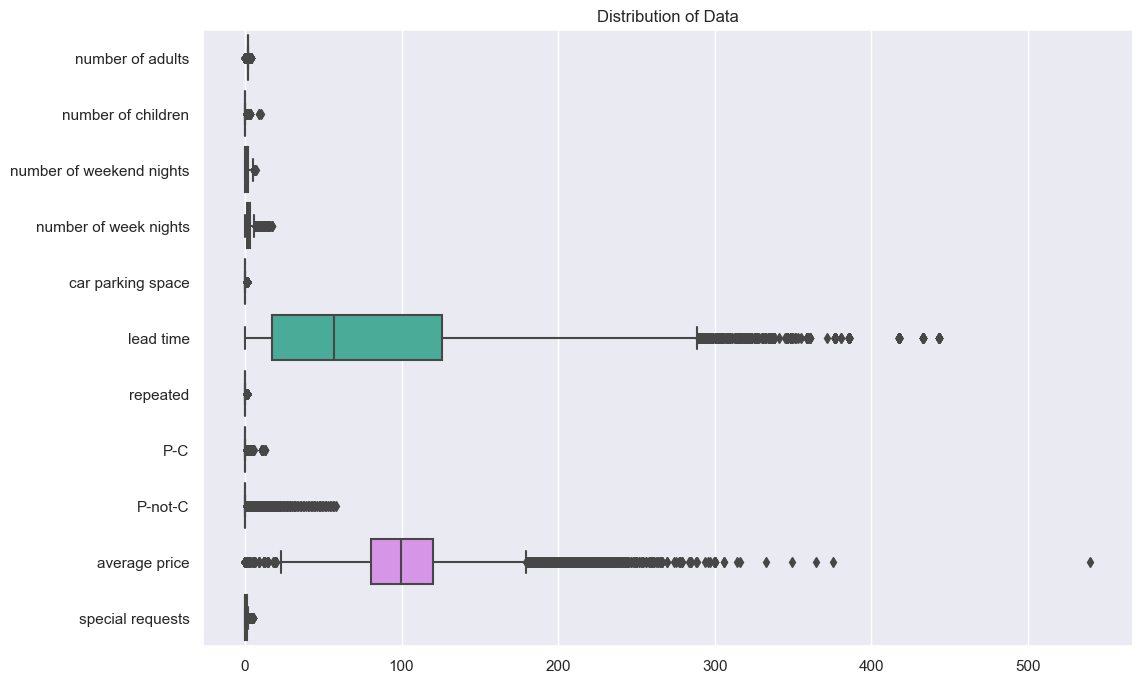

(36285, 17)


In [13]:
# Visualize box plots for each numerical variable
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=source_df, orient="h") # Create box plots for numerical variables
plt.title("Distribution of Data")
plt.show()
print(source_df.shape)

### Data Pre-Processing

In [14]:
# Drop unnecessary column and adjust index
source_df.drop(["Booking_ID"], axis=1, inplace=True)
source_df.index = source_df.index + 1 # Adjust the index

In [15]:
# Handling outliers
outliers_cols = ["lead time", "average price"]
for column in outliers_cols:
    if source_df[column].dtype in ["int64", "float64"]:
        q1 = source_df[column].quantile(0.25)
        q3 = source_df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        source_df = source_df[(source_df[column] >= lower_bound) & (source_df[column] <= upper_bound)]

In [16]:
source_df

number of adults  number of children  number of weekend nights  \
1                     1                   1                         2   
2                     1                   0                         1   
3                     2                   1                         1   
4                     1                   0                         0   
5                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         1   
36282                 2                   0                         1   
36283                 2                   0                         1   
36284                 3                   0                         0   
36285                 2                   0                         0   

       number of week nights  type of meal  car parking space    room type  \
1                          5   Meal Plan 1                  0  Room_Type 1   
2                          3  Not Selected                  0  Room_Type 1   
3                          3   Meal Plan 1                  0  Room_Type 1   
4                          2   Meal Plan 1                  0  Room_Type 1   
5                          2  Not Selected                  0  Room_Type 1   
...                      ...           ...                ...          ...   
36280                      1  Not Selected                  0  Room_Type 1   
36282                      3   Meal Plan 1                  0  Room_Type 1   
36283                      3   Meal Plan 1                  0  Room_Type 4   
36284                      4   Meal Plan 1                  0  Room_Type 1   
36285                      5   Meal Plan 1                  0  Room_Type 4   

       lead time market segment type  repeated  P-C  P-not-C  average price  \
1            224             Offline         0    0        0          88.00   
2              5              Online         0    0        0         106.68   
3              1              Online         0    0        0          50.00   
4            211              Online         0    0        0         100.00   
5             48              Online         0    0        0          77.00   
...          ...                 ...       ...  ...      ...            ...   
36280         48              Online         0    0        0          94.50   
36282         34              Online         0    0        0         107.55   
36283         83              Online         0    0        0         105.61   
36284        121             Offline         0    0        0          96.90   
36285         44              Online         0    0        0         133.44   

       special requests date of reservation booking status  
1                     0           10/2/2015   Not_Canceled  
2                     1           11/6/2018   Not_Canceled  
3                     0           2/28/2018       Canceled  
4                     1           5/20/2017       Canceled  
5                     0           4/11/2018       Canceled  
...                 ...                 ...            ...  
36280                 0           4/11/2018       Canceled  
36282                 1          10/15/2017   Not_Canceled  
36283                 1          12/26/2018   Not_Canceled  
36284                 1            7/6/2018   Not_Canceled  
36285                 3          10/18/2018   Not_Canceled  

[33345 rows x 16 columns]

In [17]:
# Feature engineering
source_df["booking status"] = source_df["booking status"].replace({"Canceled": 1, "Not_Canceled": 0})  # Convert categorical to numerical
source_df = source_df[~source_df["date of reservation"].str.contains("-")]  # Remove rows with invalid date format
source_df["date of reservation"] = pd.to_datetime(source_df["date of reservation"])  # Convert to datetime
source_df["day"] = source_df["date of reservation"].dt.day  # Extract day
source_df["month"] = source_df["date of reservation"].dt.month  # Extract month
source_df["year"] = source_df["date of reservation"].dt.year  # Extract year
source_df = source_df.drop(columns=["date of reservation"])  # Drop the original date column
source_df["average price"] = source_df["average price"].round().astype(int)  # Round and convert to int

In [18]:
source_df

number of adults  number of children  number of weekend nights  \
1                     1                   1                         2   
2                     1                   0                         1   
3                     2                   1                         1   
4                     1                   0                         0   
5                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         1   
36282                 2                   0                         1   
36283                 2                   0                         1   
36284                 3                   0                         0   
36285                 2                   0                         0   

       number of week nights  type of meal  car parking space    room type  \
1                          5   Meal Plan 1                  0  Room_Type 1   
2                          3  Not Selected                  0  Room_Type 1   
3                          3   Meal Plan 1                  0  Room_Type 1   
4                          2   Meal Plan 1                  0  Room_Type 1   
5                          2  Not Selected                  0  Room_Type 1   
...                      ...           ...                ...          ...   
36280                      1  Not Selected                  0  Room_Type 1   
36282                      3   Meal Plan 1                  0  Room_Type 1   
36283                      3   Meal Plan 1                  0  Room_Type 4   
36284                      4   Meal Plan 1                  0  Room_Type 1   
36285                      5   Meal Plan 1                  0  Room_Type 4   

       lead time market segment type  repeated  P-C  P-not-C  average price  \
1            224             Offline         0    0        0             88   
2              5              Online         0    0        0            107   
3              1              Online         0    0        0             50   
4            211              Online         0    0        0            100   
5             48              Online         0    0        0             77   
...          ...                 ...       ...  ...      ...            ...   
36280         48              Online         0    0        0             94   
36282         34              Online         0    0        0            108   
36283         83              Online         0    0        0            106   
36284        121             Offline         0    0        0             97   
36285         44              Online         0    0        0            133   

       special requests  booking status  day  month  year  
1                     0               0    2     10  2015  
2                     1               0    6     11  2018  
3                     0               1   28      2  2018  
4                     1               1   20      5  2017  
5                     0               1   11      4  2018  
...                 ...             ...  ...    ...   ...  
36280                 0               1   11      4  2018  
36282                 1               0   15     10  2017  
36283                 1               0   26     12  2018  
36284                 1               0    6      7  2018  
36285                 3               0   18     10  2018  

[33312 rows x 18 columns]

In [19]:
# One-hot encode categorical columns
source_df = pd.get_dummies(source_df, columns=source_df.select_dtypes(include=["object"]).columns)
source_df = source_df.replace({True: 1, False: 0})

In [20]:
source_df

number of adults  number of children  number of weekend nights  \
1                     1                   1                         2   
2                     1                   0                         1   
3                     2                   1                         1   
4                     1                   0                         0   
5                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         1   
36282                 2                   0                         1   
36283                 2                   0                         1   
36284                 3                   0                         0   
36285                 2                   0                         0   

       number of week nights  car parking space  lead time  repeated  P-C  \
1                          5                  0        224         0    0   
2                          3                  0          5         0    0   
3                          3                  0          1         0    0   
4                          2                  0        211         0    0   
5                          2                  0         48         0    0   
...                      ...                ...        ...       ...  ...   
36280                      1                  0         48         0    0   
36282                      3                  0         34         0    0   
36283                      3                  0         83         0    0   
36284                      4                  0        121         0    0   
36285                      5                  0         44         0    0   

       P-not-C  average price  ...  room type_Room_Type 3  \
1            0             88  ...                      0   
2            0            107  ...                      0   
3            0             50  ...                      0   
4            0            100  ...                      0   
5            0             77  ...                      0   
...        ...            ...  ...                    ...   
36280        0             94  ...                      0   
36282        0            108  ...                      0   
36283        0            106  ...                      0   
36284        0             97  ...                      0   
36285        0            133  ...                      0   

       room type_Room_Type 4  room type_Room_Type 5  room type_Room_Type 6  \
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
5                          0                      0                      0   
...                      ...                    ...                    ...   
36280                      0                      0                      0   
36282                      0                      0                      0   
36283                      1                      0                      0   
36284                      0                      0                      0   
36285                      1                      0                      0   

       room type_Room_Type 7  market segment type_Aviation  \
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   
5                          0                             0   
...                      ...                           ...   
36280                      0                             0   
36282                      0           

### Visualization After Data Cleaning

<Figure size 1200x800 with 0 Axes>

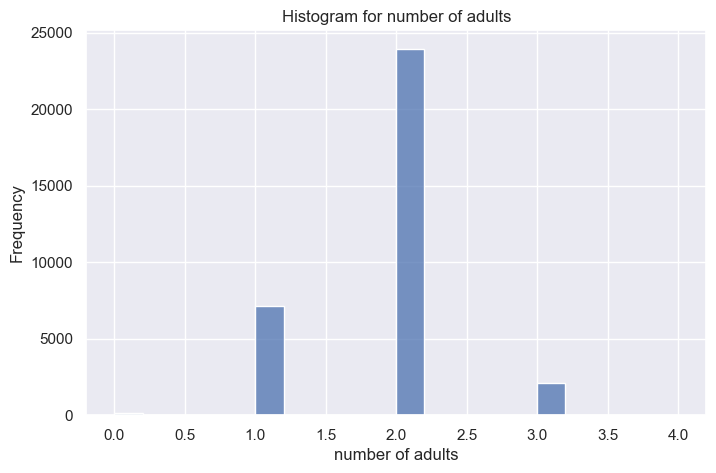

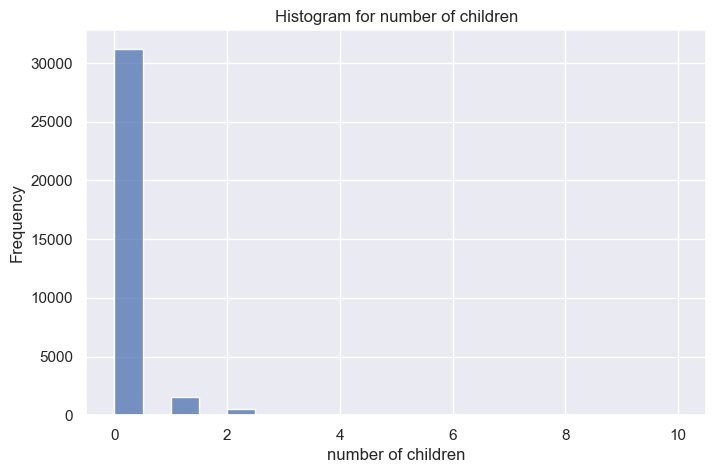

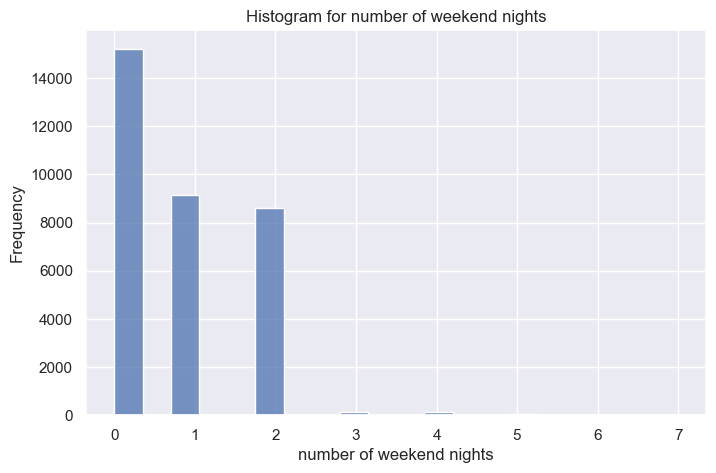

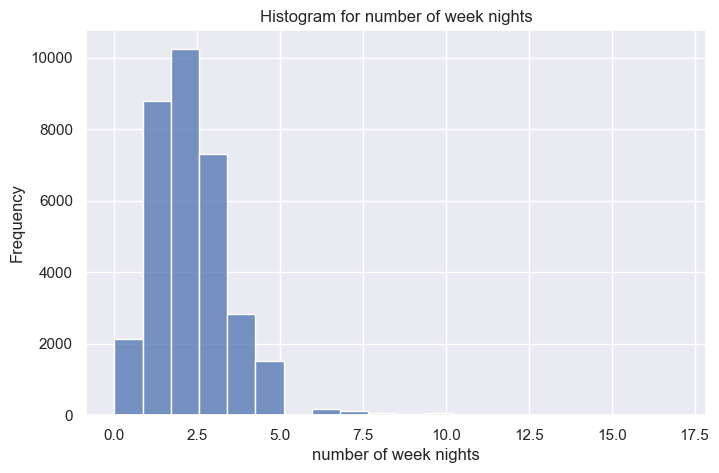

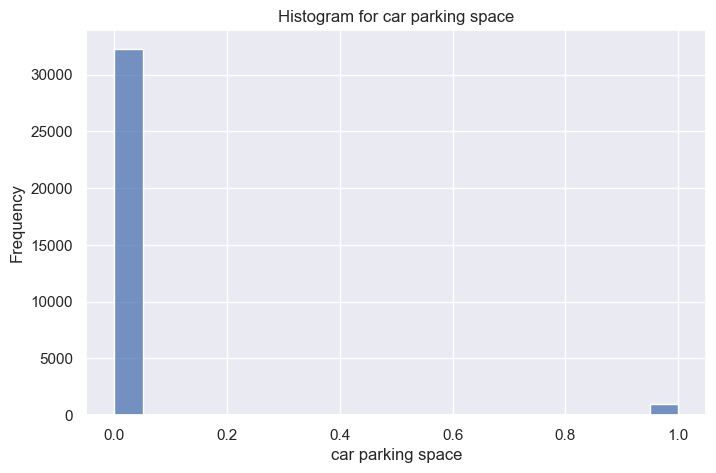

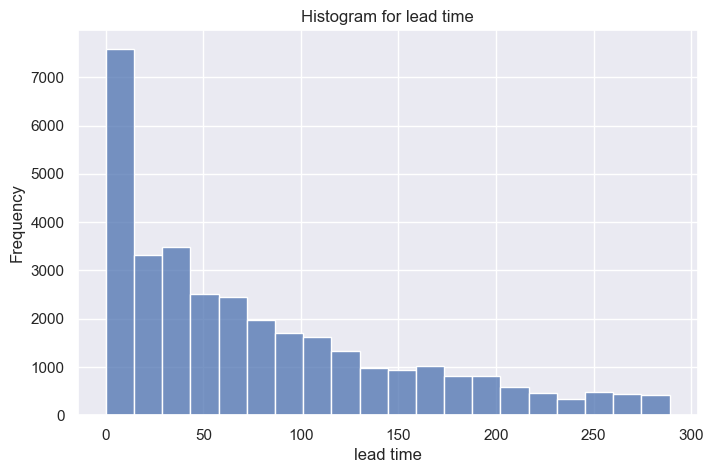

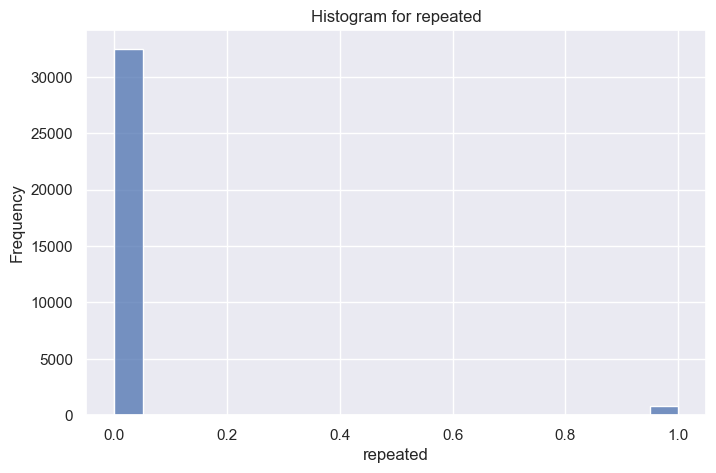

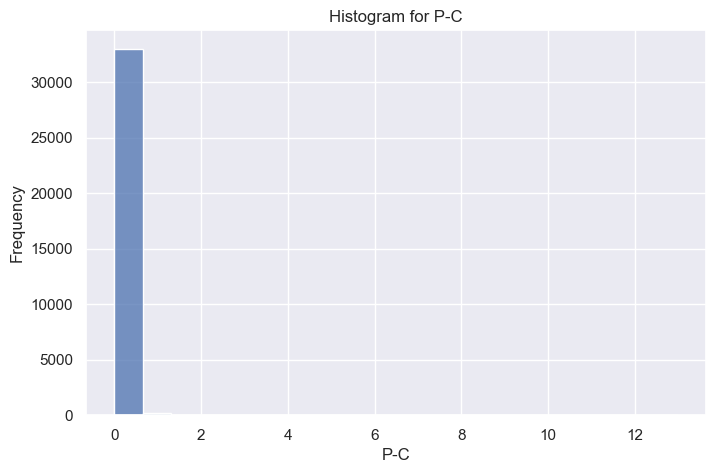

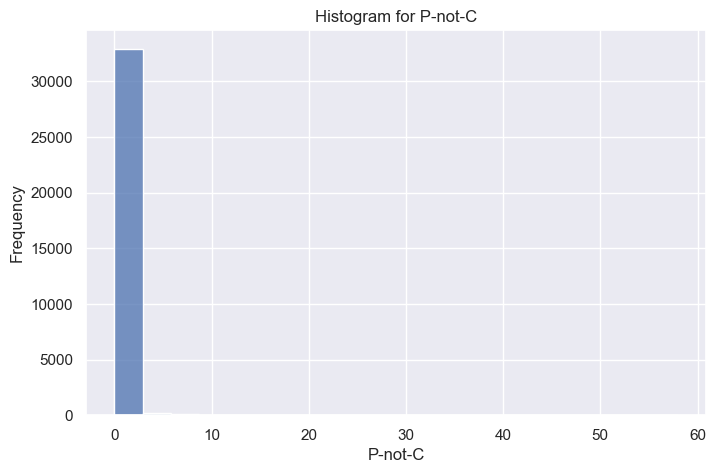

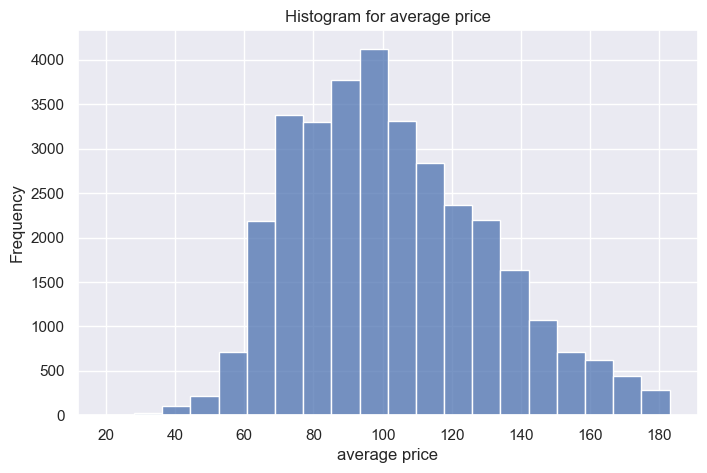

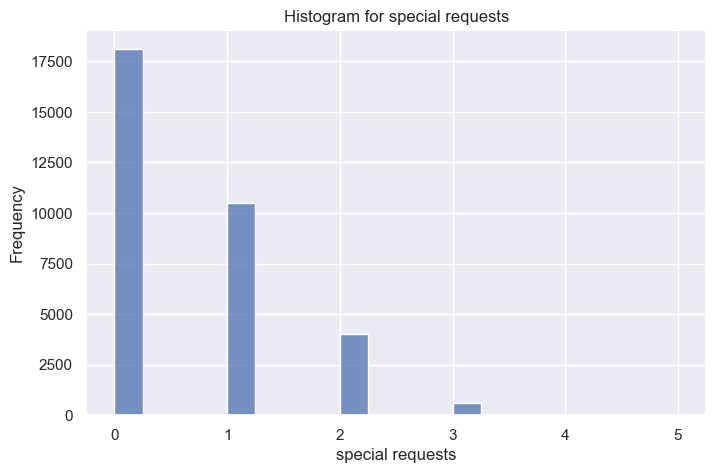

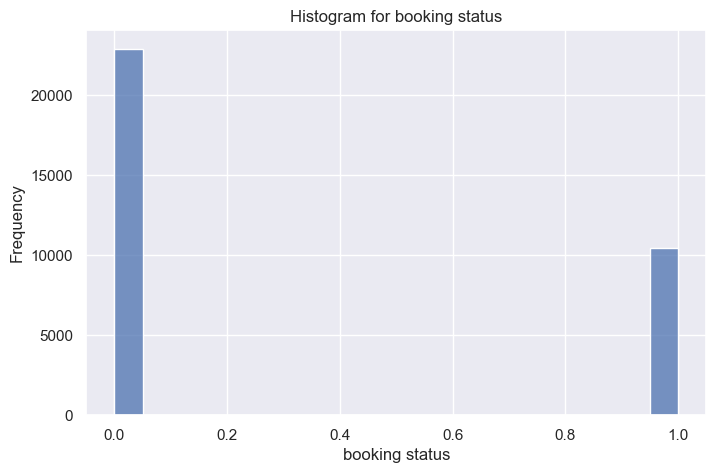

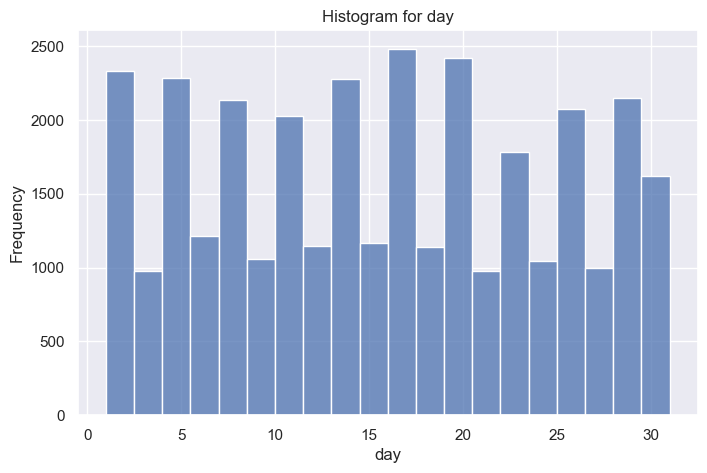

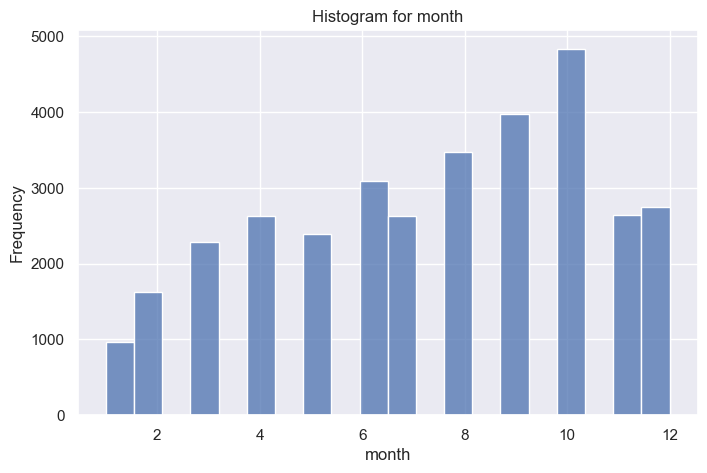

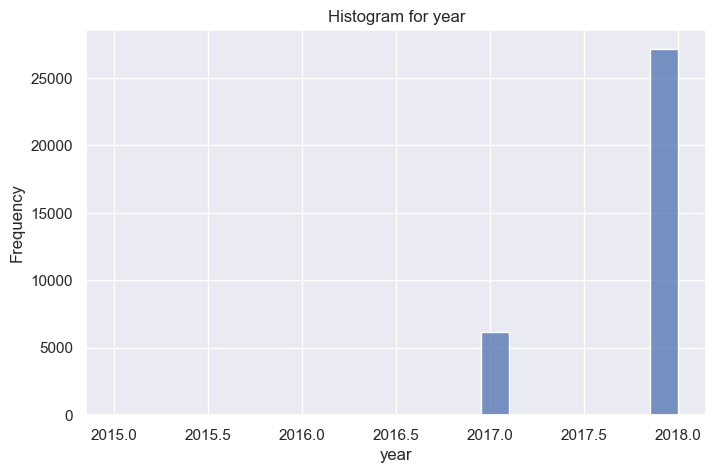

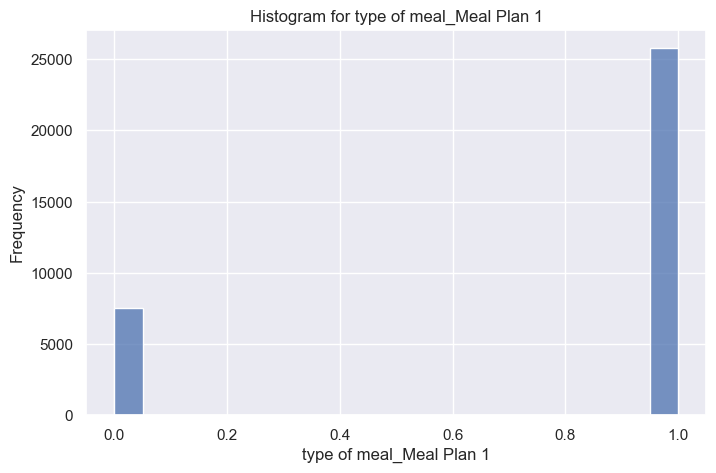

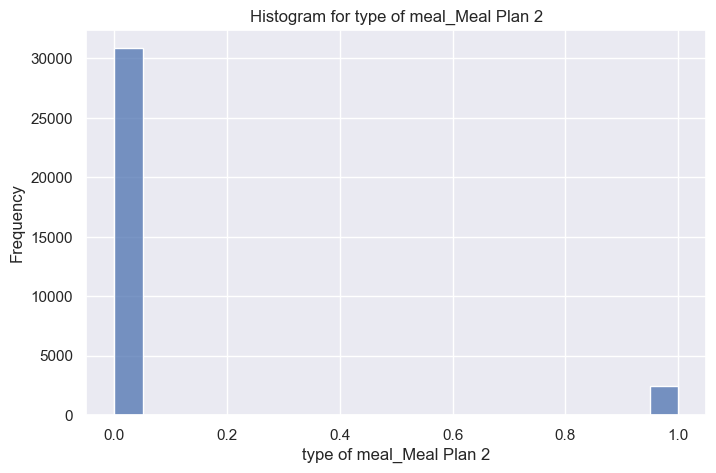

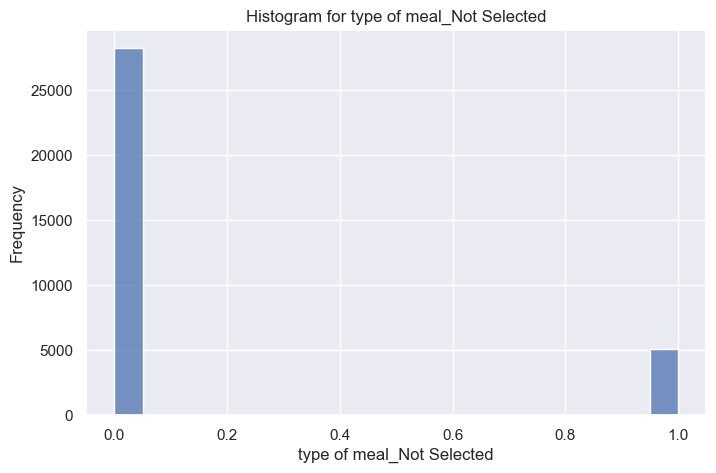

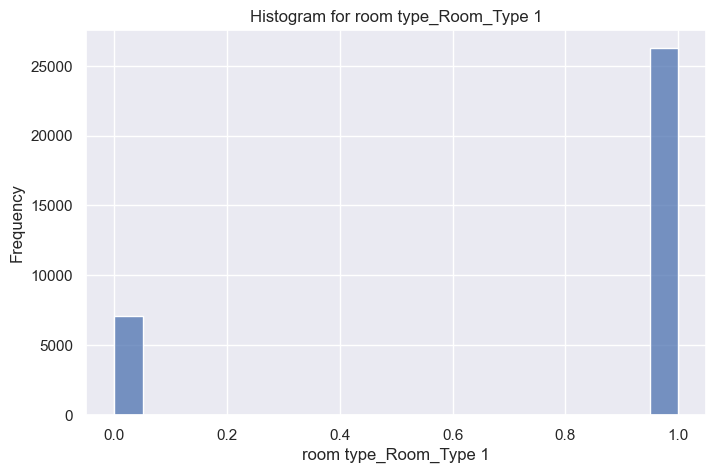

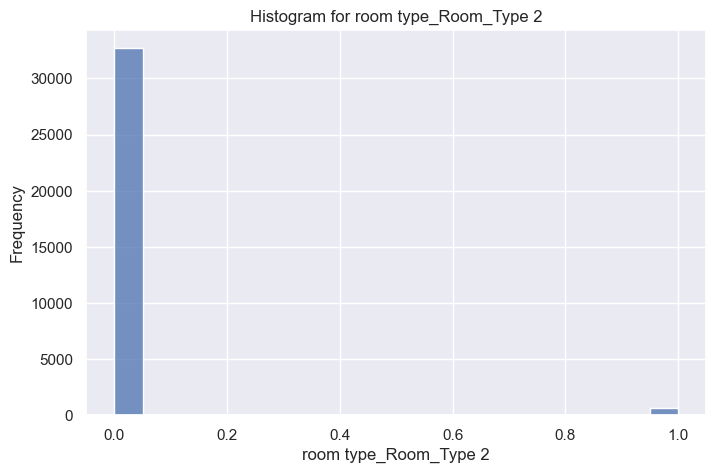

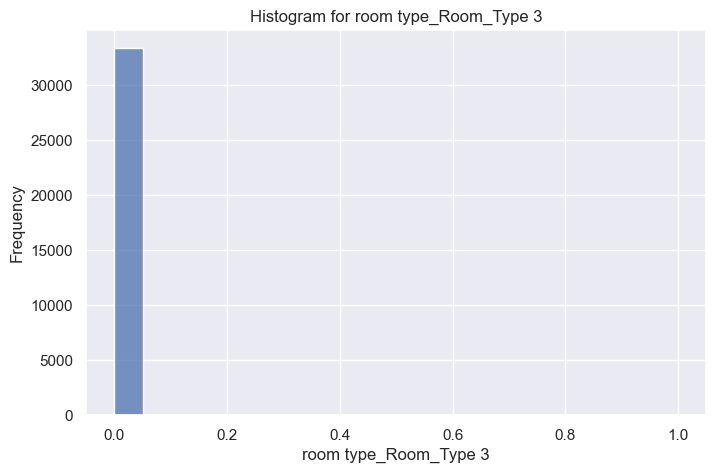

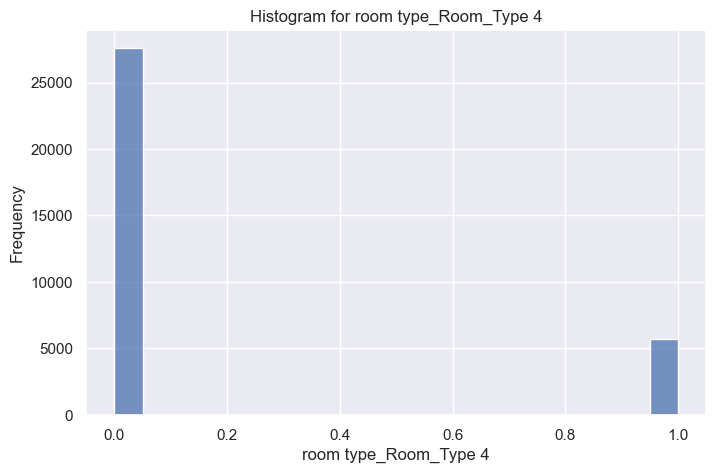

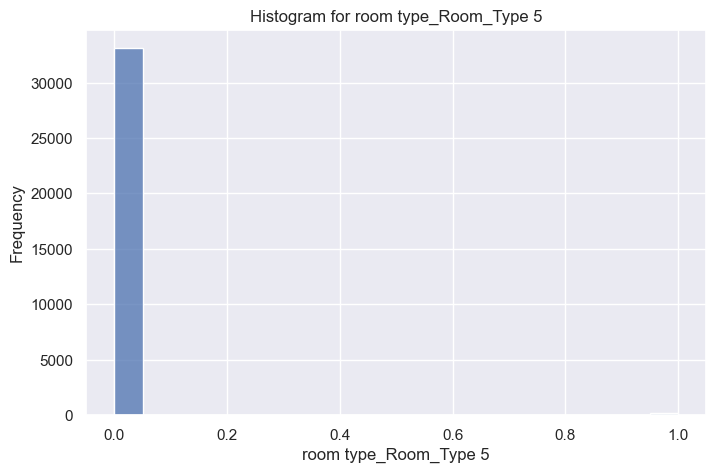

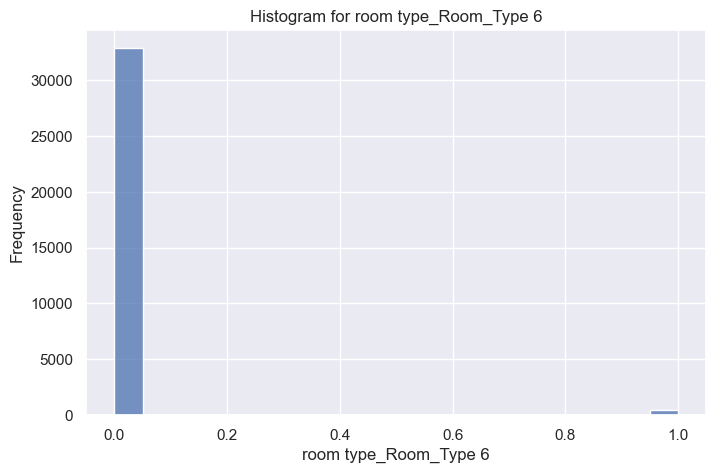

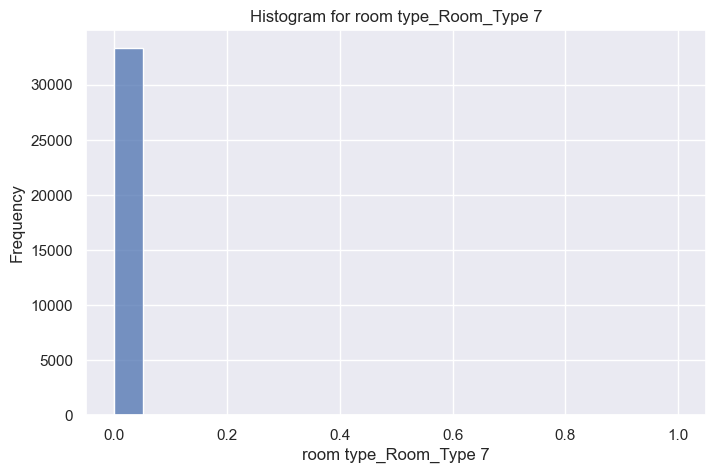

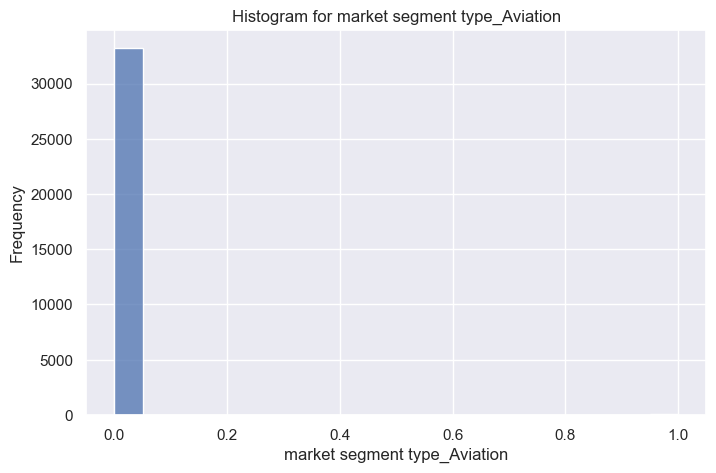

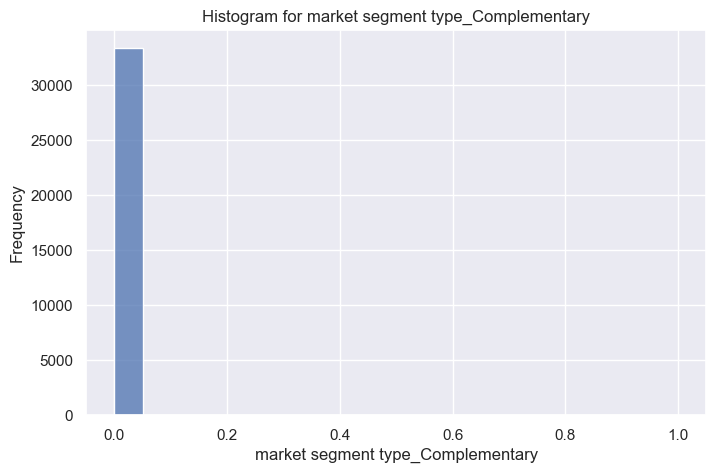

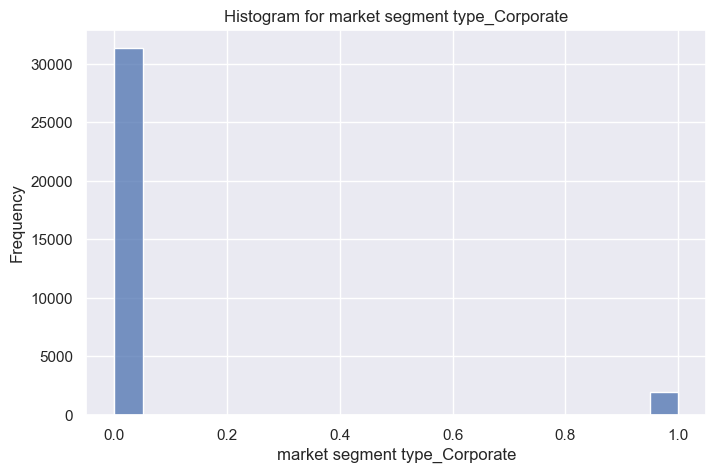

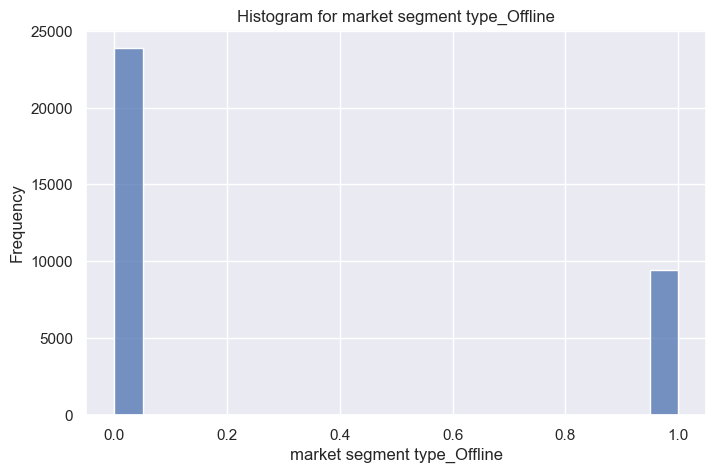

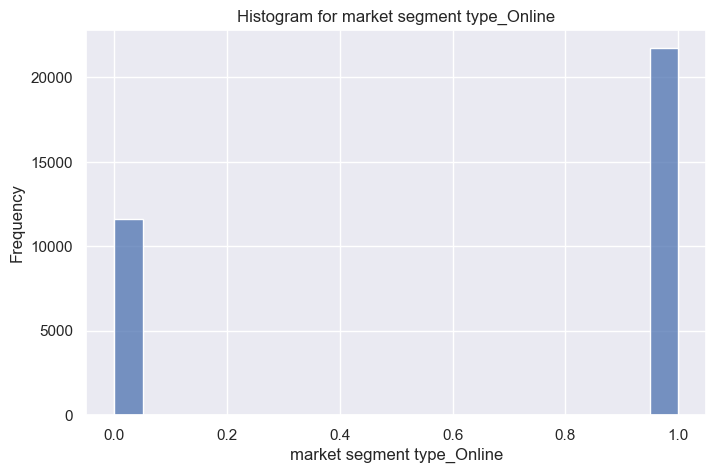

In [21]:
plt.figure(figsize=(12, 8))

# Iterate through each column and create a histogram
for column in source_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(source_df[column], kde=False, bins=20)  # Adjust bins as needed
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

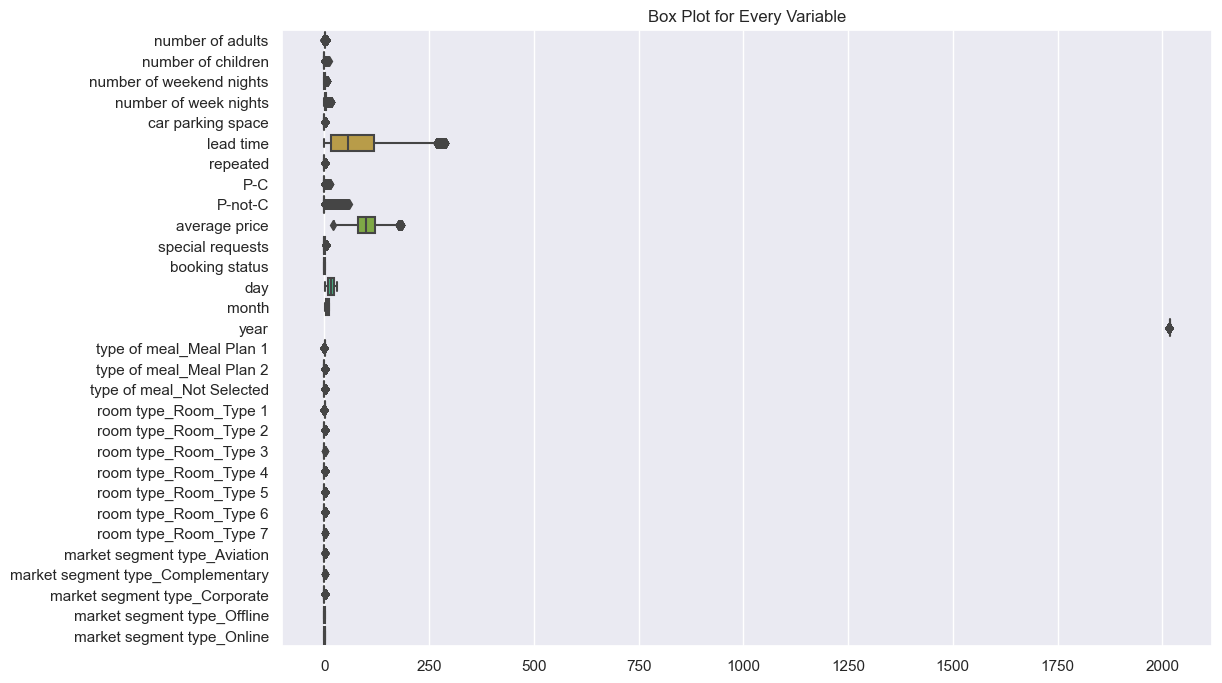

In [22]:
# Visualizing dataframe
plt.figure(figsize=(12, 8))
sns.boxplot(data=source_df, orient="h") # Box plot for every variable
plt.title("Box Plot for Every Variable")
plt.show()

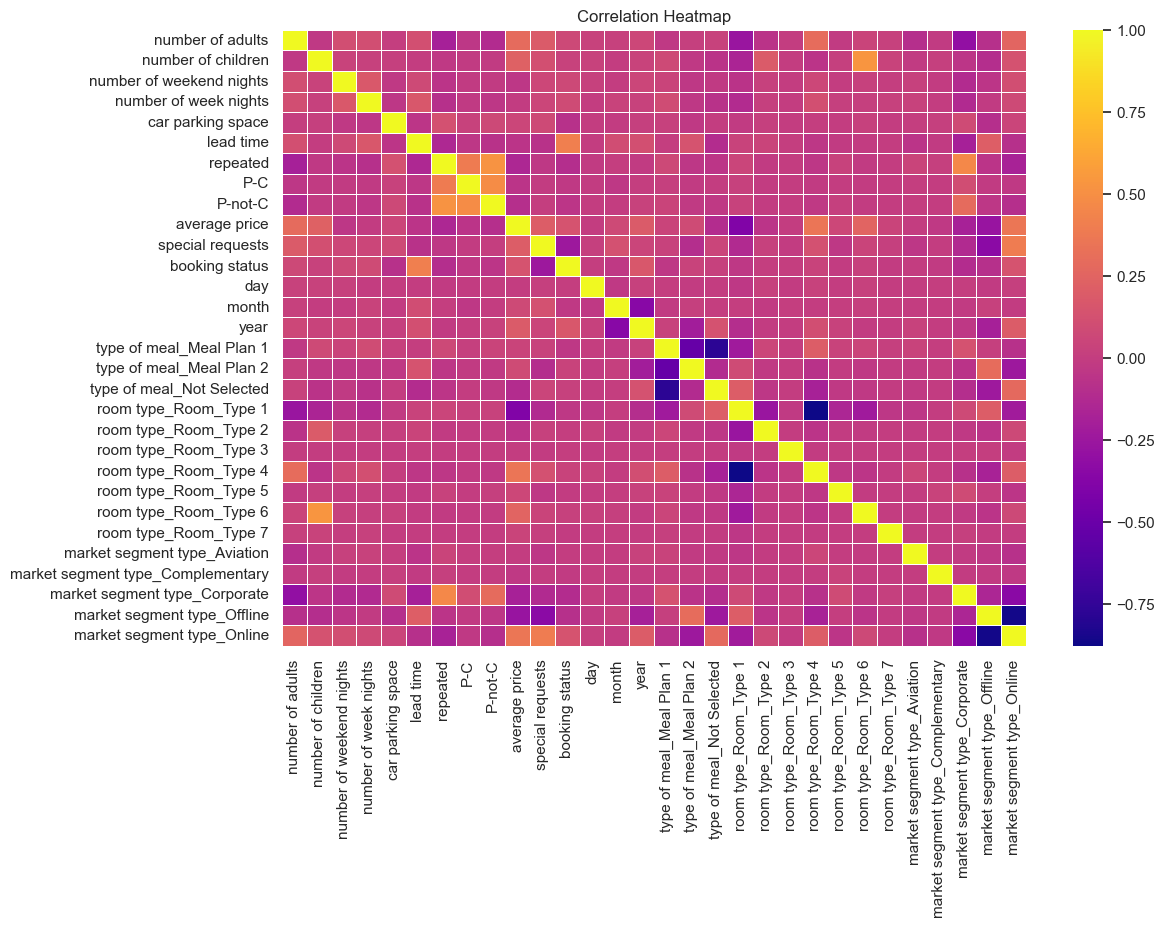

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(source_df.corr(), cmap="plasma", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Feature Selection

In [24]:
# Feature selection using SelectKBest
features = source_df.drop(["booking status"], axis=1)
target = source_df["booking status"]
k_best = SelectKBest(score_func=f_classif, k=10) # Select the top 10 features
X = k_best.fit_transform(features, target)

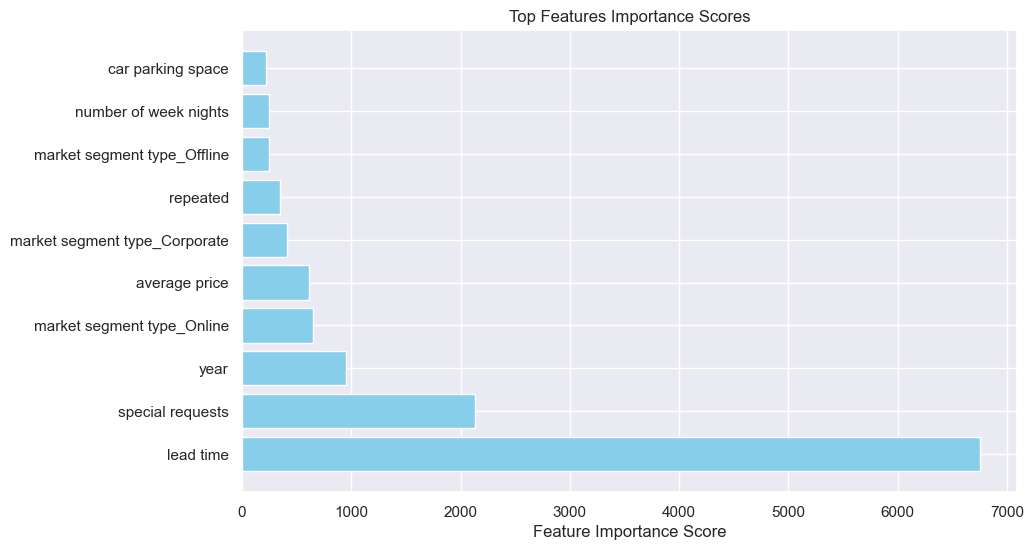

In [25]:
# Visualize the importance scores of features
feature_info = list(zip(features.columns, k_best.scores_))
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(10, 6))
plt.barh(*zip(*sorted_feature_info), color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Top Features Importance Scores")
plt.show()

In [26]:
sorted_feature_info

[('lead time', 6755.2504672754385),
 ('special requests', 2136.140964796476),
 ('year', 952.0736105412374),
 ('market segment type_Online', 646.7756741304838),
 ('average price', 614.8361515604577),
 ('market segment type_Corporate', 414.3201504402535),
 ('repeated', 343.9023467898484),
 ('market segment type_Offline', 250.2149225057271),
 ('number of week nights', 248.87676143140948),
 ('car parking space', 216.59678620432067)]

### Train, Test and Scale The Data

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=5)

In [28]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Hidden layer nodes 
**1st Neural Model**
int((features.shape[1] + 1) / 2): This calculates the number of nodes in the hidden layer of the Multi-Layer Perceptron (MLP) model. The rule of thumb suggests taking half of the number of input features and adding 1.

**2nd Neural Model**
hidden_layer_nodes_1 = int((X_train_scaled.shape[1] + 1) / 2)
hidden_layer_nodes_2 = int((hidden_layer_nodes_1 + 1) / 2)
This rule aims to strike a balance between model complexity and avoiding underfitting or overfitting.The number of nodes is influenced by the number of input features, and by halving the nodes in each subsequent layer, it gradually reduces the complexity of the representation.

**3rd Neural Model**
The number of nodes is chosen based on experimentation and domain knowledge.
A larger number of nodes in the first layer (50) might allow the network to capture more complex patterns in the data.
A smaller number of nodes in the second layer (25) could act as a form of dimensionality reduction, preventing overfitting and capturing higher-level features.

### Parameters of Neural Network
**1. hidden_layer_sizes**

Explanation: Determines the number of nodes in each hidden layer.

Choice Rationale: In the example, it's set to (hidden_layer_nodes,) for a single hidden layer, or (hidden_layer_nodes_1, hidden_layer_nodes_2) for two hidden layers. This controls the capacity of the neural network to learn complex patterns.

**2. activation**

Explanation: Specifies the activation function used in the hidden layers.

Choice Rationale: "relu" (Rectified Linear Unit) is a commonly used activation function that introduces non-linearity and helps the model learn complex patterns.

**3. solver**

Explanation: Chooses the optimization algorithm to update weights during training.

Choice Rationale: "adam" is a popular choice as it adapts learning rates during training, making it suitable for a variety of problems. It often converges faster and performs well in practice.

**4. max_iter**

Explanation: Sets the maximum number of iterations (epochs) for training.

Choice Rationale: 1000 is chosen as a reasonable number of iterations to allow the model to converge. 

**5. alpha**

Explanation: L2 regularization parameter.

Choice Rationale: Helps prevent overfitting by penalizing large weights. A small value like 0.0001 strikes a balance between regularization and allowing the model to fit the training data.

**6. batch_size**

Explanation: Determines the number of samples used in each iteration of gradient descent.

Choice Rationale: 32 is a common batch size. Smaller batches introduce more randomness, potentially helping the model escape local minima, while larger batches provide more stable updates.

**7. learning_rate_init**

Explanation: Sets the initial learning rate for weight updates.

Choice Rationale: 0.001 is a commonly used value. It's a moderate learning rate that balances between learning quickly and avoiding overshooting the minimum.

**8. early_stopping**

Explanation: Enables or disables early stopping.

Choice Rationale: True is chosen to prevent overfitting. Training is halted when the performance on a validation set stops improving, avoiding unnecessary computation.

**9. validation_fraction**

Explanation: Fraction of training data to use as a validation set for early stopping.

Choice Rationale: 0.1 means 10% of the training data is used for validation. A reasonable portion to monitor the model's generalization performance during training.

**10. n_iter_no_change**

Explanation: Number of iterations with no improvement to trigger early stopping.

Choice Rationale: 10 means if there's no improvement on the validation set for 10 consecutive iterations, training will stop early. This guards against overfitting and saves computation time.

In [37]:
# 1st Neural Network model training and evaluation
hidden_layer_nodes = int((X_train_scaled.shape[1] + 1) / 2)

mlp_params = {
    "hidden_layer_sizes": (hidden_layer_nodes,),
    "activation": "relu",  # Activation function for hidden layers
    "solver": "adam",  # Optimization algorithm to update weights
    "max_iter": 1000,  # Maximum number of iterations
    "alpha": 0.0001,  # L2 regularization parameter
    "batch_size": 32,  # Batch size
    "learning_rate_init": 0.001,  # Initial learning rate
    "early_stopping": True,  # Enable early stopping
    "validation_fraction": 0.1,  # Fraction of training data to use as validation set for early stopping
    "n_iter_no_change": 10  # Number of iterations with no improvement to trigger early stopping
}

mlp_model = MLPClassifier(**mlp_params)

# Train the model with scaled data
mlp_model.fit(X_train_scaled, y_train)

# Test the model with scaled data
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [38]:
# Display model performance metrics for Neural Network
print("\nNeural Network Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_mlp)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_mlp)}")


Neural Network Performance Metrics:
Accuracy: 0.80
Confusion Matrix: 
[[6154  723]
 [1231 1886]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6877
           1       0.72      0.61      0.66      3117

    accuracy                           0.80      9994
   macro avg       0.78      0.75      0.76      9994
weighted avg       0.80      0.80      0.80      9994



In [31]:
# 2nd Neural Network model training and evaluation
hidden_layer_nodes_1 = int((X_train_scaled.shape[1] + 1) / 2)
hidden_layer_nodes_2 = int((hidden_layer_nodes_1 + 1) / 2)

mlp_params = {
    "hidden_layer_sizes": (hidden_layer_nodes_1, hidden_layer_nodes_2),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 1000,
    "alpha": 0.0001, 
    "batch_size": 32, 
    "learning_rate_init": 0.001,  
    "early_stopping": True, 
    "validation_fraction": 0.1, 
    "n_iter_no_change": 10  
}

mlp_model = MLPClassifier(**mlp_params)

# Train the model with scaled data
mlp_model.fit(X_train_scaled, y_train)

# Test the model with scaled data
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [32]:
# Display model performance metrics for Neural Network
print("\nNeural Network Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_mlp)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_mlp)}")


Neural Network Performance Metrics:
Accuracy: 0.81
Confusion Matrix: 
[[5990  887]
 [1047 2070]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6877
           1       0.70      0.66      0.68      3117

    accuracy                           0.81      9994
   macro avg       0.78      0.77      0.77      9994
weighted avg       0.80      0.81      0.81      9994



In [33]:
# 3rd Neural Network model training and evaluation
hidden_layer_nodes_1 = 50
hidden_layer_nodes_2 = 25

mlp_params = {
    "hidden_layer_sizes": (hidden_layer_nodes_1, hidden_layer_nodes_2),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 1000,
    "alpha": 0.0001,  
    "batch_size": 32, 
    "learning_rate_init": 0.001, 
    "early_stopping": True,  
    "validation_fraction": 0.1,  
    "n_iter_no_change": 10 
}

mlp_model = MLPClassifier(**mlp_params)

# Train the model with scaled data
mlp_model.fit(X_train_scaled, y_train)

# Test the model with scaled data
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [34]:
# Display model performance metrics for Neural Network
print("\nNeural Network Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_mlp)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred_mlp)}")


Neural Network Performance Metrics:
Accuracy: 0.84
Confusion Matrix: 
[[6228  649]
 [ 916 2201]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6877
           1       0.77      0.71      0.74      3117

    accuracy                           0.84      9994
   macro avg       0.82      0.81      0.81      9994
weighted avg       0.84      0.84      0.84      9994



### Extra: Comparing Ensemble Learning Alogrithims To Neural Network

In [35]:
# Model training and evaluation for ensemble learning algorithms
def train_and_evaluate(model, params, name):
    grid_search = GridSearchCV(model, param_grid=params, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

In [39]:
# Model training and evaluation using Logistic Regression
log_reg_params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
log_reg_grid_search = GridSearchCV(LogisticRegression(), param_grid=log_reg_params, cv=5)
log_reg_grid_search.fit(X_train_scaled, y_train)
log_reg_best_model = log_reg_grid_search.best_estimator_
y_pred_log_reg = log_reg_best_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg_0 = precision_score(y_test, y_pred_log_reg, pos_label=0)
recall_log_reg_0 = recall_score(y_test, y_pred_log_reg, pos_label=0)
f1_log_reg_0 = f1_score(y_test, y_pred_log_reg, pos_label=0)
precision_log_reg_1 = precision_score(y_test, y_pred_log_reg, pos_label=1)
recall_log_reg_1 = recall_score(y_test, y_pred_log_reg, pos_label=1)
f1_log_reg_1 = f1_score(y_test, y_pred_log_reg, pos_label=1)

print("\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}")
print(f"Precision (Class 0): {precision_log_reg_0:.2f}")
print(f"Recall (Class 0): {recall_log_reg_0:.2f}")
print(f"F1-Score (Class 0): {f1_log_reg_0:.2f}")
print(f"Precision (Class 1): {precision_log_reg_1:.2f}")
print(f"Recall (Class 1): {recall_log_reg_1:.2f}")
print(f"F1-Score (Class 1): {f1_log_reg_1:.2f}")
print(f"Best Parameters (Logistic Regression): {log_reg_grid_search.best_params_}")
print(f"Best Score (Logistic Regression): {log_reg_grid_search.best_score_}")

# Model training and evaluation using K-Nearest Neighbors (KNN)
knn_params = {"n_neighbors": np.arange(1, 10)}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)
knn_best_model = knn_grid_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn_0 = precision_score(y_test, y_pred_knn, pos_label=0)
recall_knn_0 = recall_score(y_test, y_pred_knn, pos_label=0)
f1_knn_0 = f1_score(y_test, y_pred_knn, pos_label=0)
precision_knn_1 = precision_score(y_test, y_pred_knn, pos_label=1)
recall_knn_1 = recall_score(y_test, y_pred_knn, pos_label=1)
f1_knn_1 = f1_score(y_test, y_pred_knn, pos_label=1)

print(f"\nKNN Performance Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print(f"Precision (Class 0): {precision_knn_0:.2f}")
print(f"Recall (Class 0): {recall_knn_0:.2f}")
print(f"F1-Score (Class 0): {f1_knn_0:.2f}")
print(f"Precision (Class 1): {precision_knn_1:.2f}")
print(f"Recall (Class 1): {recall_knn_1:.2f}")
print(f"F1-Score (Class 1): {f1_knn_1:.2f}")
print(f"Best Parameters (KNN): {knn_grid_search.best_params_}")
print(f"Best Score (KNN): {knn_grid_search.best_score_}")

# Model training and evaluation using Decision Tree
dt_params = {"max_depth": np.arange(0, 30, 5), "criterion": ["gini", "entropy"]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv=5)
dt_grid_search.fit(X_train_scaled, y_train)
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt_0 = precision_score(y_test, y_pred_dt, pos_label=0)
recall_dt_0 = recall_score(y_test, y_pred_dt, pos_label=0)
f1_dt_0 = f1_score(y_test, y_pred_dt, pos_label=0)
precision_dt_1 = precision_score(y_test, y_pred_dt, pos_label=1)
recall_dt_1 = recall_score(y_test, y_pred_dt, pos_label=1)
f1_dt_1 = f1_score(y_test, y_pred_dt, pos_label=1)

print(f"\nDecision Tree Performance Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"Precision (Class 0): {precision_dt_0:.2f}")
print(f"Recall (Class 0): {recall_dt_0:.2f}")
print(f"F1-Score (Class 0): {f1_dt_0:.2f}")
print(f"Precision (Class 1): {precision_dt_1:.2f}")
print(f"Recall (Class 1): {recall_dt_1:.2f}")
print(f"F1-Score (Class 1): {f1_dt_1:.2f}")
print(f"Best Parameters (Decision Tree): {dt_grid_search.best_params_}")
print(f"Best Score (Decision Tree): {dt_grid_search.best_score_}")

# Model training and evaluation using Random Forest
rf_params = {"max_depth": [20], "n_estimators": [20]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf_0 = precision_score(y_test, y_pred_rf, pos_label=0)
recall_rf_0 = recall_score(y_test, y_pred_rf, pos_label=0)
f1_rf_0 = f1_score(y_test, y_pred_rf, pos_label=0)
precision_rf_1 = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf_1 = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf_1 = f1_score(y_test, y_pred_rf, pos_label=1)

print(f"\nRandom Forest Performance Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"Precision (Class 0): {precision_rf_0:.2f}")
print(f"Recall (Class 0): {recall_rf_0:.2f}")
print(f"F1-Score (Class 0): {f1_rf_0:.2f}")
print(f"Precision (Class 1): {precision_rf_1:.2f}")
print(f"Recall (Class 1): {recall_rf_1:.2f}")
print(f"F1-Score (Class 1): {f1_rf_1:.2f}")
print(f"Best Parameters (Random Forest): {rf_grid_search.best_params_}")
print(f"Best Score (Random Forest): {rf_grid_search.best_score_}")



Logistic Regression Performance Metrics:
Accuracy: 0.79
F1 Score: 0.64
Precision (Class 0): 0.82
Recall (Class 0): 0.89
F1-Score (Class 0): 0.86
Precision (Class 1): 0.70
Recall (Class 1): 0.58
F1-Score (Class 1): 0.64
Best Parameters (Logistic Regression): {'C': 1, 'penalty': 'l2'}
Best Score (Logistic Regression): 0.8025133537291677

KNN Performance Metrics:
Accuracy: 0.85
F1 Score: 0.75
Precision (Class 0): 0.88
Recall (Class 0): 0.91
F1-Score (Class 0): 0.89
Precision (Class 1): 0.78
Recall (Class 1): 0.72
F1-Score (Class 1): 0.75
Best Parameters (KNN): {'n_neighbors': 7}
Best Score (KNN): 0.8514022657106104

Decision Tree Performance Metrics:
Accuracy: 0.86
F1 Score: 0.77
Precision (Class 0): 0.89
Recall (Class 0): 0.90
F1-Score (Class 0): 0.90
Precision (Class 1): 0.78
Recall (Class 1): 0.75
F1-Score (Class 1): 0.77
Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 15}
Best Score (Decision Tree): 0.8586928813339861

Random Forest Performance Metrics:
Accurac